## Observations and Insights

1. Mouse weight is strongly correlated with tumor size.
----------------------------------------------------------
2. Ketapril and Naftisol seemed to perform worse than the placebo, in terms of average tumor volumes. 
----------------------------------------------------------
3. Capolumin had the best response to treatment.
----------------------------------------------------------

## Dependencies and starter code

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pp

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data= pd.merge(mouse_metadata, study_results, on="Mouse ID")
complete_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regiment

#building summary stats table
summ_stats = complete_data.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :["mean","median","var","std", "sem"]})
summ_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [98]:
#tumor volume calculations to get unique values
mid = complete_data["Mouse ID"].unique()
drugreg = complete_data["Drug Regimen"].unique()
timep = complete_data["Timepoint"].unique()

#counting lengths of v calculations to get proper variables
num_mice = len(mid)
num_drug = len(drugreg)
num_measurement = len(timep)

#setting up data
num_sample = num_drug * num_measurement

#setting up table
data_summary = pd.DataFrame({"Number of Mice": [num_mice],
                         "Number of Drug Regimen Treatments": [num_drug],
                         "Number of Time Measurements": [num_measurement],
                         "Number of Samples": [num_sample]})
data_summary


,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


## Bar plots

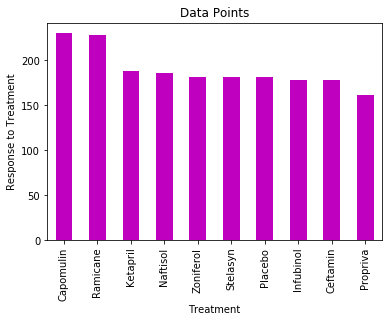

In [99]:
# Generate a bar plot showing number of data points for each treatment regimen using pandast

# Get data I want
treatment_data = complete_data["Drug Regimen"].value_counts()
treatment_data.plot(kind="bar", facecolor="m")

# Set text for titles
plt.title("Data Points")
plt.ylabel("Response to Treatment")
plt.xlabel("Treatment")
plt.show()

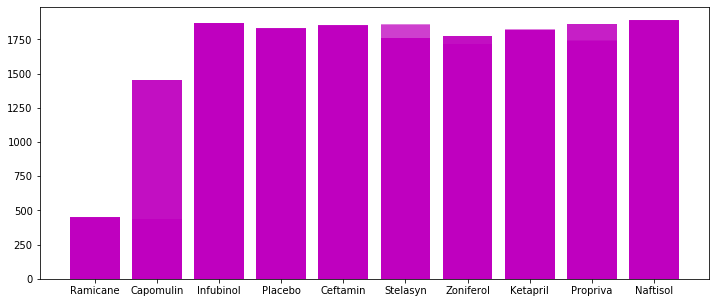

In [100]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(complete_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(complete_data["Drug Regimen"], x_axis, color=['m'], alpha=0.5, align="center")

plt.show()

## Pie plots

In [127]:
#getting mouse data by gender
m_data = mouse_metadata['Sex'].value_counts()
m_data.head()

Male      125
Female    124
Name: Sex, dtype: int64

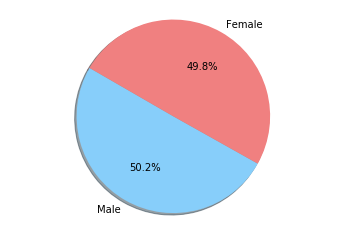

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
values = [125,124]
labels = 'Male','Female'
color_chart=['lightskyblue', 'lightcoral']

#plotting mouse pie chart
plt.pie(values, explode=None, labels=labels, colors=color_chart, autopct='%1.1f%%', shadow=True, startangle=150)             
plt.axis('equal')
plt.show() 

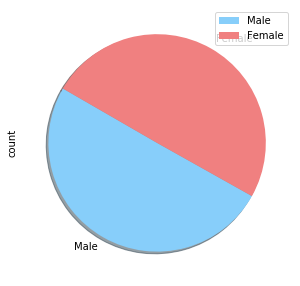

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#setting up data frame
gender_df = pd.DataFrame({'count':[125, 124]},
                   index = ['Male', 'Female'])
gender_pie = gender_df.plot.pie(y='count', figsize=(5, 5),colors = color_chart, shadow=True, startangle=150)


## Quartiles, outliers and boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the most promising 
#treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


#locating data I want for the 4 drugs that look promising to me
capomulin_data = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin"]
ramicane_data = complete_data.loc[complete_data["Drug Regimen"] == "Ramicane"]
ketapril_data = complete_data.loc[complete_data["Drug Regimen"] == "Ketapril"]
naftisol_data = complete_data.loc[complete_data["Drug Regimen"] == "Naftisol"]

naftisol_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
558,a818,Naftisol,Female,12,28,0,45.000000,0
559,a818,Naftisol,Female,12,28,5,45.696709,0
560,a818,Naftisol,Female,12,28,10,49.790919,0
561,a818,Naftisol,Female,12,28,15,51.227566,0
562,a818,Naftisol,Female,12,28,20,54.834624,0


In [192]:
#Capomulin
cap_final = capomulin_data.groupby('Mouse ID').max()['Timepoint']
cap_final_vol = pd.DataFrame(cap_final)
cap_final_merge = pd.merge(cap_final_vol, complete_data, on=("Mouse ID","Timepoint"),how="left")

#tumor calc
cap_tumors = cap_final_merge["Tumor Volume (mm3)"]

#setting my quartile ranges based on data
quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#setting boundaries
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin outliers are below {lower_bound} and above {upper_bound}.")

Capomulin outliers are below 20.70456164999999 and above 51.83201549.


In [193]:
#Ramicane
ram_final = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ram_final_vol = pd.DataFrame(ram_final)
ram_final_merge = pd.merge(ram_final_vol, complete_data, on=("Mouse ID","Timepoint"),how="left")

#tumor calc
ram_tumors = ram_final_merge["Tumor Volume (mm3)"]

#setting my quartile ranges based on data
quartiles_2 = ram_tumors.quantile([.25,.5,.75])
lowerq_2 = quartiles_2[0.25]
upperq_2 = quartiles_2[0.75]
iqr_2 = upperq_2-lowerq_2

#setting boundaries
lower_bound_2 = lowerq_2 - (1.5*iqr_2)
upper_bound_2 = upperq_2 + (1.5*iqr_2)
print(f"Ramicane outliers are below {lower_bound_2} and above {upper_bound_2}.")

Ramicane outliers are below 17.912664470000003 and above 54.30681135.


In [194]:
#Ketapril
ket_final = ketapril_data.groupby('Mouse ID').max()['Timepoint']
ket_final_vol = pd.DataFrame(ket_final)
ket_final_merge = pd.merge(ket_final_vol, complete_data, on=("Mouse ID","Timepoint"),how="left")


#tumor calc
ket_tumors = ket_final_merge["Tumor Volume (mm3)"]

#setting my quartile ranges based on data
quartiles_3 = ket_tumors.quantile([.25,.5,.75])
lowerq_3 = quartiles_3[0.25]
upperq_3 = quartiles_3[0.75]
iqr_3 = upperq_3-lowerq_3

#setting boundaries
lower_bound_3 = lowerq_3 - (1.5*iqr_3)
upper_bound_3 = upperq_3 + (1.5*iqr_3)
print(f"Ketapril outliers are below {lower_bound_3} and above {upper_bound_3}.")

Ketapril outliers are below 36.99186244000001 and above 89.60048379999998.


In [195]:
#Naftisol
naf_final = naftisol_data.groupby('Mouse ID').max()['Timepoint']
naf_final_vol = pd.DataFrame(naf_final)
naf_final_merge = pd.merge(naf_final_vol, complete_data, on=("Mouse ID","Timepoint"),how="left")


#tumor calc
naf_tumors = naf_final_merge["Tumor Volume (mm3)"]

#setting my quartile ranges based on data
quartiles_4 = naf_tumors.quantile([.25,.5,.75])
lowerq_4 = quartiles_4[0.25]
upperq_4 = quartiles_4[0.75]
iqr_4 = upperq_4-lowerq_4

#setting boundaries
lower_bound_4 = lowerq_4 - (1.5*iqr_4)
upper_bound_4 = upperq_4 + (1.5*iqr_4)
print(f"Naftisol outliers are between {lower_bound_4} and above {upper_bound_4}.")

Naftisol outliers are between 25.85334408499999 and above 95.78978676500002.


In [199]:
#Capomulin Final Merge
cap_final_merge.head(4)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1


In [198]:
#Ramicane Final Merge
ram_final_merge.head(4)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1


In [197]:
#Ketapril Final Merge
ket_final_merge.head(4)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a457,10,Ketapril,Female,11,30,49.783419,0
1,c580,30,Ketapril,Male,22,25,58.046569,3
2,c819,40,Ketapril,Male,21,25,62.175705,1
3,c832,45,Ketapril,Male,18,29,65.415955,3


In [196]:
#Naftisol Final Merge
naf_final_merge.head(4)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a818,45,Naftisol,Female,12,28,74.997764,2
1,b559,45,Naftisol,Male,20,26,73.051363,1
2,e213,45,Naftisol,Male,8,27,63.105696,4
3,e291,25,Naftisol,Female,14,29,55.138953,2
4,e584,45,Naftisol,Male,9,27,68.359777,4


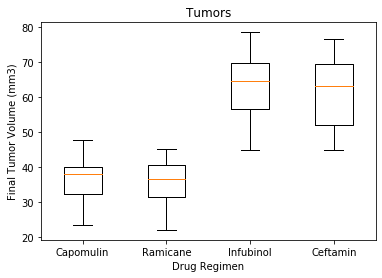

In [200]:
#Plotting data into boxplot format
boxplot_data = [cap_tumors, ram_tumors, ket_tumors, naf_tumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(boxplot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])


plt.show()

## Line and scatter plots

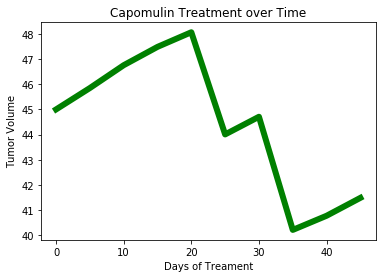

In [213]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#gathering data I want
lineplot_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l469",:]
lineplot_data.head()
#setting x and y values
timepoints = forline_df["Timepoint"]
tumor_volumes = forline_df["Tumor Volume (mm3)"]
#plotting and executing
plt.title('Capomulin Treatment over Time')
plt.plot(timepoints, tumor_volumes,linewidth=6, color='g', markersize=12)
plt.xlabel('Days of Treament')
plt.ylabel('Tumor Volume')

plt.show()

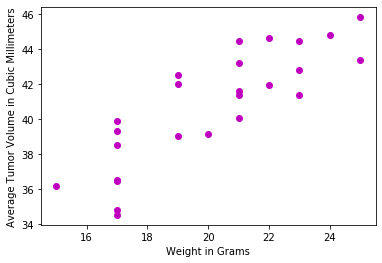

In [212]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_tumors_avg = capomulin_data.groupby(['Mouse ID']).mean()

#plotting my scatterplot based on grouped values of weights and volumes
plt.scatter(cap_tumors_avg['Weight (g)'],cap_tumors_avg['Tumor Volume (mm3)'], color= 'm')
plt.xlabel('Weight in Grams')
plt.ylabel('Average Tumor Volume in Cubic Millimeters')

plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [214]:
#correlation calculations
correlation_co=round(st.pearsonr(cap_tumors_avg['Weight (g)'],cap_tumors_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation_co}")


The correlation between mouse weight and average tumor volume is 0.84


In [215]:
#linear regression calculations
model=st.linregress(cap_tumors_avg['Weight (g)'],cap_tumors_avg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

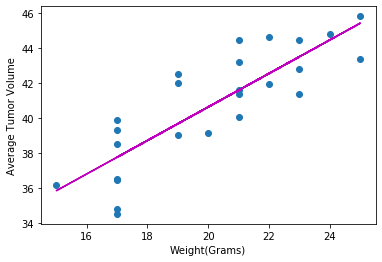

In [220]:
#plotting linear regression
slope_lin = 0.9544396890241045
intercept_lin = 21.552160532685015
y_values = cap_tumors_avg['Weight (g)']*slope_lin+intercept_lin

#plotting
plt.scatter(cap_tumors_avg['Weight (g)'],cap_tumors_avg['Tumor Volume (mm3)'])
plt.plot(cap_tumors_avg['Weight (g)'],y_values,color="m")
plt.xlabel('Weight(Grams)')
plt.ylabel('Average Tumor Volume')
plt.show()